# Data Preparation

In [ ]:
import pandas as pd
import itertools
import networkx as nx

In [ ]:
# Installing scipy version 1.8.0, due to issues concerning plotting the networks in google colab

pip install scipy==1.8.0

SyntaxError: ignored

In [ ]:
# Mount Google Drive to access the already scraped metadata 

from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#drive.flush_and_unmount()


In [ ]:
# Read metadata from mounted Google Drive folder

df = pd.read_hdf("/content/drive/MyDrive/data WIR/metadata_qid_1_with_paperId.h5","df")

In [ ]:
!pip install python-terrier

import pyterrier as pt
if not pt.started():
  pt.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/72.6 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.0/293.0 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━

PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



## Download and index TREC Covid Cord 19 Dataset

In [ ]:
# Download and index the TREC Covid Dataset

import os

dataset = pt.datasets.get_dataset('irds:cord19/trec-covid')
pt_index_path = './indices/cord19'

if not os.path.exists(pt_index_path + "/data.properties"):
  indexer = pt.index.IterDictIndexer(pt_index_path, blocks=True)
  index_ref = indexer.index(dataset.get_corpus_iter(), 
                            fields=['title', 'abstract'],
                            meta=('docno','doi','title'))
  
else:
  index_ref = pt.IndexRef.of(pt_index_path + "/data.properties")
  
index = pt.IndexFactory.of(index_ref)

[INFO] [starting] building docstore
[INFO] If you have a local copy of https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/80d664e496b8b7e50a39c6f6bb92e0ef
[INFO] [starting] https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv
docs_iter:   0%|                                    | 0/192509 [00:00<?, ?doc/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 0.00/269M [00:00<?, ?B/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 57.3k/269M [00:00<08:30, 527kB/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.1%| 262k/269M [00:00<03:51, 1.16MB/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.4%| 1.16M/269M [00:00<01:20, 3.35MB/s]
https://ai2-semanticscholar-cord-

cord19/trec-covid documents:   0%|          | 0/192509 [00:00<?, ?it/s]

<ipython-input-6-a79ee2c3a232>:10: DeprecationWarning: specifying meta and meta_lengths in IterDictIndexer.index() is deprecated, use constructor instead
  index_ref = indexer.index(dataset.get_corpus_iter(),


14:30:22.073 [ForkJoinPool-1-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (8is9x9sc) - further warnings are suppressed
14:32:29.301 [ForkJoinPool-1-worker-3] ERROR org.terrier.structures.indexing.Indexer - Could not finish MetaIndexBuilder: 
java.io.IOException: Key 8lqzfj2e is not unique: 37597,11755
For MetaIndex, to suppress, set metaindex.compressed.reverse.allow.duplicates=true
	at org.terrier.structures.collections.FSOrderedMapFile$MultiFSOMapWriter.mergeTwo(FSOrderedMapFile.java:1374)
	at org.terrier.structures.collections.FSOrderedMapFile$MultiFSOMapWriter.close(FSOrderedMapFile.java:1308)
	at org.terrier.structures.indexing.BaseMetaIndexBuilder.close(BaseMetaIndexBuilder.java:321)
	at org.terrier.structures.indexing.classical.BasicIndexer.indexDocuments(BasicIndexer.java:270)
	at org.terrier.structures.indexing.classical.BasicIndexer.createDirectIndex(BasicIndexer.java:388)
	at org.terrier.structures.indexing.Indexer.index(Inde

## Retrieve documents for Baseline

In [ ]:
# Creating a first baseline with BM25 and the Top 1000 results per topic

bm25 = pt.BatchRetrieve(index_ref , wmodel='BM25', num_results=1000, metadata=["docno","doi","title"])
res = bm25.transform(dataset.get_topics('title'))
res

[INFO] [starting] https://ir.nist.gov/covidSubmit/data/topics-rnd5.xml
[INFO] [finished] https://ir.nist.gov/covidSubmit/data/topics-rnd5.xml: [00:00] [18.7kB] [6.42MB/s]


,qid,docid,docno,doi,title,rank,score,query
0,1,122804,75773gwg,,Zoonotic origins of human coronavirus 2019 (HC...,0,11.522594,coronavirus origin
1,1,122805,kn2z7lho,,Zoonotic origins of human coronavirus 2019 (HC...,1,11.522594,coronavirus origin
2,1,122806,4fb291hq,,Zoonotic origins of human coronavirus 2019 (HC...,2,11.522594,coronavirus origin
3,1,135326,ne5r4d4b,10.1038/s41579-018-0118-9,Origin and evolution of pathogenic coronaviruses,3,11.522594,coronavirus origin
4,1,187888,hl967ekh,10.24272/j.issn.2095-8137.2020.031,Zoonotic origins of human coronavirus 2019 (HC...,4,11.522594,coronavirus origin
...,...,...,...,...,...,...,...,...
49995,50,125960,m6btwab3,,Latin American scientists join the coronavirus...,995,9.274771,mrna vaccine coronavirus
49996,50,150814,1kwj1w0f,10.1038/d41586-020-00752-8,"Coronavirus vaccine trial, Mars rover delay an...",996,9.274771,mrna vaccine coronavirus
49997,50,86205,y53sp8wc,,Assembly in vitro of a spanning membrane prote...,997,9.274010,mrna vaccine coronavirus
49998,50,186638,duwr9b5b,10.1126/science.abc1669,SARS-CoV-2 productively infects human gut ente...,998,9.270078,mrna vaccine coronavirus


## Create Result List for QID#1

In [ ]:
# Drop all documents from result list, that are not included in the metadata file

res_QID1_exp = res[res["docno"].isin(df["docid"].tolist())]

In [ ]:
# Drop all duplicated documents that have the same title for the same qid

res_QID1_exp = res_QID1_exp.drop_duplicates(subset=['title', 'qid'], keep='first')

In [ ]:
# Drop duplicates with the same doc number

res_QID1_exp = res_QID1_exp.drop_duplicates(subset=['docno'], keep='first')

In [ ]:
# Only keep results for QID 1

res_QID1_exp = res_QID1_exp[res_QID1_exp["qid"]== "1"]

In [ ]:
# Reset the index due to the missing documents (duplicates, not included in metadata file)

res_QID1_exp = res_QID1_exp.reset_index()

In [ ]:
# Correcting the ranks, due to the deletion of duplicates

res_QID1_exp['rank'] = res_QID1_exp.index + 1

In [ ]:
# Dropping outdated index column

res_QID1_exp = res_QID1_exp.drop(["index"], axis=1)

In [ ]:
res_QID1_exp

,qid,docid,docno,doi,title,rank,score,query
0,1,135326,ne5r4d4b,10.1038/s41579-018-0118-9,Origin and evolution of pathogenic coronaviruses,1,11.522594,coronavirus origin
1,1,187888,hl967ekh,10.24272/j.issn.2095-8137.2020.031,Zoonotic origins of human coronavirus 2019 (HC...,2,11.522594,coronavirus origin
2,1,159730,12dcftwt,10.3201/eid2607.200092,Possible Bat Origin of Severe Acute Respirator...,3,11.382127,coronavirus origin
3,1,68581,4dtk1kyh,10.1101/2020.05.12.091397,Origin of Novel Coronavirus (COVID-19): A Comp...,4,11.222577,coronavirus origin
4,1,169722,h8ahn8fw,10.1093/cid/ciaa112,Origin and Evolution of the 2019 Novel Coronav...,5,11.197148,coronavirus origin
...,...,...,...,...,...,...,...,...
591,1,67321,n5hnx2c3,10.5543/tkda.2020.03374,Traditional Chinese medicine practices used in...,592,7.247352,coronavirus origin
592,1,177809,uw2a8uwj,10.1016/j.virol.2006.11.027,The intracellular sites of early replication a...,593,7.247352,coronavirus origin
593,1,30266,7p7rcfdu,10.1146/annurev-pathol-012414-040501,Birth and pathogenesis of rogue respiratory vi...,594,7.243892,coronavirus origin
594,1,69779,xxlvyp5c,10.1001/jama.2020.7903,Surgery in a Time of Uncertainty: A Need for U...,595,7.243892,coronavirus origin


# Calculations

## Function for calculating average/maximum centrality for authors in graph

In [ ]:
def calculate_graph_metric_max_min_citation_graph(metric, df, Graph):
  from statistics import mean
  import collections

  df_temp = df.copy()

  # Choosing the centrality metric
  if metric == "degree":
    measure = nx.degree_centrality(Graph)
    # Normalizing the centrality value (from 0 - 1)
    measure.update((x, (y)/collections.Counter(measure).most_common()[0][1]) for x, y in measure.items())

  if metric == "closeness":
    measure = nx.closeness_centrality(Graph)
    # Normalizing the centrality value (from 0 - 1)

    measure.update((x, (y)/collections.Counter(measure).most_common()[0][1]) for x, y in measure.items())

  if metric == "betweeness":
    measure = nx.betweenness_centrality(Graph)
    # Normalizing the centrality value (from 0 - 1)
    measure.update((x, (y)/collections.Counter(measure).most_common()[0][1]) for x, y in measure.items())

  
  measure_scores = []
  for i,j in df_temp.iterrows():
    score_list = []
    # Iterating through the participating authors
    for k in j["author_id"]:
      if type(k) != list:
        # Searching author node in graph and extract centrality measure for author
        if k in measure:
          score_list.append(measure[k])
      else:
        score_list.append(0)

         
    measure_scores.append(score_list)
  
  # Add the centrality measures for all participating authors to the corresponding documents
  df_temp["measure_score"] = measure_scores

  # Calculating the average centrality score for the co-author nodes
  mean_measure = []
  for i in df_temp["measure_score"]:
    if len(i)> 0:
      mean_measure.append(mean(i))
    else:
      mean_measure.append(0)
  df_temp["avg_measure"] = mean_measure

  # Calculating the maximum centrality of the participating authors of the document
  max_measure = []
  for i in df_temp["measure_score"]:
    if len(i)> 0:
      max_measure.append(max(i))
    else:
      max_measure.append(0)
  df_temp["max_measure"] = max_measure

  return df_temp

## Function for calculating average/maximum centrality for papers in graph

In [ ]:
def calculate_graph_metric_max_min_citation_graph_paper(metric, df, Graph):
  from statistics import mean
  import collections

  df_temp = df.copy()
  # Choosing the centrality metric

  if metric == "degree":
    measure = nx.degree_centrality(Graph)
    # Normalizing the centrality value (from 0 - 1)

    measure.update((x, (y)/collections.Counter(measure).most_common()[0][1]) for x, y in measure.items())

  if metric == "closeness":
    measure = nx.closeness_centrality(Graph)
    # Normalizing the centrality value (from 0 - 1)

    measure.update((x, (y)/collections.Counter(measure).most_common()[0][1]) for x, y in measure.items())

  if metric == "betweeness":
    measure = nx.betweenness_centrality(Graph)
    # Normalizing the centrality value (from 0 - 1)

    measure.update((x, (y)/collections.Counter(measure).most_common()[0][1]) for x, y in measure.items())

 
  measure_scores = []
  
  # Iterating through the papers from the result list 

  for k in df_temp["paperId"]:
      if type(k) != list:
        # Extracting centrality scores from network
        if k in measure:
       
          measure_scores.append(measure[k])
        
        else:
          measure_scores.append(0)

  # Add centrality scores to the corresponding documents
  df_temp["measure_score"] = measure_scores

  # Calculating average and maximum centrality actually not needed,but
  # kept for simplicity to reuse avg_boost/max_boost function
  mean_measure = []
  for i in df_temp["measure_score"]:
    
    mean_measure.append(i)
   
  df_temp["avg_measure"] = mean_measure

  max_measure = []
  for i in df_temp["measure_score"]:
    
    max_measure.append(i)
    
  df_temp["max_measure"] = max_measure

  return df_temp

## Functions to apply the boosts (average/maximum) in the reranking

In [ ]:
def avg_boost(docno,df):
  # If document in df, return average centrality measure for authors/papers
  if docno in df["docid"].tolist():
    centrality_score = df[df["docid"] == docno]["avg_measure"].values[0]
    
    return centrality_score
  # Else return 0
  return 0 

In [ ]:
def max_boost(docno,df):
  # If document in df, return maximum centrality measure for authors/papers
  if docno in df["docid"].tolist():
    centrality_score = df[df["docid"] == docno]["max_measure"].values[0]
    
    return centrality_score
  # Else return 0
  return 0 

## Function for calculating average/maximum distance to the most central authors in graph (Rewarding high distance to most popular node)

In [ ]:
def calculate_graph_metric_most_popular_user(metric, df, Graph,cutoff, dampen_effect):
  from statistics import mean
  import collections

  df_temp = df.copy()
  
  # Choosing the centrality metric
  if metric == "degree":
    measure = nx.degree_centrality(Graph)
    # Normalizing the centrality value (from 0 - 1)
    measure.update((x, y/collections.Counter(measure).most_common()[0][1]) for x, y in measure.items())

  # Sorting nodes by centrality to find most connected/popular author in network
  most_popular_user = collections.Counter(measure).most_common()[0][0]

  # Calculate the path length between every node in the network
  calculated_distances = nx.all_pairs_shortest_path_length(Graph,cutoff = cutoff)
  dict_distances = dict(calculated_distances)
  
  import math
  distances_most_popular_user = []
  for i, j in df_temp.iterrows():
    distances_most_popular_user_temp = []
    # Iterating through the participating authors from the document 
    for k in j["author_id"]:
      if type(k) != list:
        # Extract distance between the most popular author and the author from the document
        if k in dict_distances[most_popular_user]:
          if dict_distances[most_popular_user][k] != 0:
            # To reduce the impact, the logarithm of 10 can be used
            if dampen_effect:
              distances_most_popular_user_temp.append(math.log10(dict_distances[most_popular_user][k]))
            # Otherwise the integer distance is used 
            else:
              distances_most_popular_user_temp.append(dict_distances[most_popular_user][k])
          # Prevent an error if (log10(0)), when most popular author is also the author participating at a certain document
          else:
            distances_most_popular_user_temp.append(0)
        # If no path leads to the most popular node or path is longer than choosen cutoff point, cutoff + 1 is used as distance
        else:
          # To reduce the impact, the logarithm of 10 can be used
          if dampen_effect:

            distances_most_popular_user_temp.append(math.log10(cutoff + 1 ))
            #distances_most_popular_user_temp.append(math.log10(11 ))
          
          # Otherwise the integer distance is used 
          else:
            #distances_most_popular_user_temp.append(11)
            distances_most_popular_user_temp.append(cutoff + 1 )
      # if AuthorId is not provided also use cutoff + 1  
      else:
        # To reduce the impact, the logarithm of 10 can be used
        if dampen_effect:
          distances_most_popular_user_temp.append(math.log10(cutoff + 1 ))
          #distances_most_popular_user_temp.append(math.log10(11))

        # Otherwise the integer distance is used 
        else:
          distances_most_popular_user_temp.append(cutoff + 1 )
          #distances_most_popular_user_temp.append(11)
    distances_most_popular_user.append(distances_most_popular_user_temp)
  
  # Add the distances from the authors to the most popular author to the corresponding documents
  df_temp["shortest_paths"] = distances_most_popular_user
  
  # Calculating the average distance for the co-author nodes to the most popular node 
  mean_measure = []
  for i in df_temp["shortest_paths"]:
    if len(i)> 0:
      mean_measure.append(mean(i))
    else:
      mean_measure.append(0)
  df_temp["avg_measure"] = mean_measure

  # Calculating the maximum distance of the participating co-author nodes to the most popular node 

  max_measure = []
  for i in df_temp["shortest_paths"]:
    if len(i)> 0:
      max_measure.append(max(i))
    else:
      max_measure.append(0)
  df_temp["max_measure"] = max_measure

  return df_temp

## Function for calculating average/maximum distance to the most central authors in graph (Rewarding low distance to most popular node)

In [ ]:
def calculate_graph_metric_most_popular_user_reverse(metric, df, Graph,cutoff, dampen_effect):
  from statistics import mean
  import collections

  df_temp = df.copy()
  # Choosing the centrality metric


  if metric == "degree":
    measure = nx.degree_centrality(Graph)
    # Normalizing the centrality value (from 0 - 1)
    measure.update((x, y/collections.Counter(measure).most_common()[0][1]) for x, y in measure.items())
  
  # Sorting nodes by centrality to find most connected/popular author in network
  most_popular_user = collections.Counter(measure).most_common()[0][0]

  # Calculate the path length between every node in the network

  calculated_distances = nx.all_pairs_shortest_path_length(Graph,cutoff = cutoff)#, source=most_popular_user, target=None, weight=None, method='dijkstra')
  dict_distances = dict(test)
  
  import math
  distance_gt_cutoff = cutoff + 1 
  distances_most_popular_user = []
  for i, j in df_temp.iterrows():
    distances_most_popular_user_temp = []
    # Iterating through the participating authors from the document 

    for k in j["author_id"]:
      if type(k) != list:
        if k in dict_distances[most_popular_user]:
          # Extract distance between the most popular author and the author from the document (Distances get reversed -> nearest authors have the highest distances)
          if dict_distances[most_popular_user][k] != distance_gt_cutoff:
            # To reduce the impact, the logarithm of 10 can be used
            if dampen_effect:
              distances_most_popular_user_temp.append(math.log10((dict_distances[most_popular_user][k] - distance_gt_cutoff) * -1))
            # Otherwise the integer distance is used 
            else:
              distances_most_popular_user_temp.append((dict_distances[most_popular_user][k] - distance_gt_cutoff) * -1)
          # If authors reaches maximum cutoff distance, authors gets zero score
          else:
            distances_most_popular_user_temp.append(0)
        # If authors has no link within cutoff range, authors gets zero score
        else:
          distances_most_popular_user_temp.append(0)
      # If author is not provided, authors gets zero score
      else:
        distances_most_popular_user_temp.append(0)
    distances_most_popular_user.append(distances_most_popular_user_temp)
  
  # Add the distances from the authors to the most popular author to the corresponding documents

  df_temp["shortest_paths"] = distances_most_popular_user
  

  # Calculating the average distance for the co-author nodes to the most popular node 
  mean_measure = []
  for i in df_temp["shortest_paths"]:
    if len(i)> 0:
      mean_measure.append(mean(i))
    else:
      mean_measure.append(0)
  df_temp["avg_measure"] = mean_measure

  # Calculating the maximum distance of the participating co-author nodes to the most popular node 

  max_measure = []
  for i in df_temp["shortest_paths"]:
    if len(i)> 0:
      max_measure.append(max(i))
    else:
      max_measure.append(0)
  df_temp["max_measure"] = max_measure

  return df_temp

## Function for calculating average/maximum Coreness 

In [ ]:
def calculate_graph_coreness(metric, df, Graph):
  from statistics import mean
  import collections

  df_temp = df.copy()

  # Calculate normalized degree centrality for the journals in the graph
  if metric == "degree":
    measure = nx.degree_centrality(Graph)
    measure.update((x, y/collections.Counter(measure).most_common()[0][1]) for x, y in measure.items())

  # Extract centrality measures for journals from the graph
  measure_scores = []
  for i,j in df_temp.iterrows():
    score_list = []
    for k in j["journals"]:
      
      if type(k) != list:
        if k in measure:
    
          score_list.append(measure[k])
      else:
        score_list.append(0)

         
    measure_scores.append(score_list)

  # Add centrality measures to the dataframe
  df_temp["measure_score"] = measure_scores

  # Muss ich noch weglassen
  mean_measure = []
  for i in df_temp["measure_score"]:
    if len(i)> 0:
      mean_measure.append(mean(i))
    else:
      mean_measure.append(0)
  df_temp["avg_measure"] = mean_measure

  max_measure = []
  for i in df_temp["measure_score"]:
    if len(i)> 0:
      max_measure.append(max(i))
    else:
      max_measure.append(0)
  df_temp["max_measure"] = max_measure

  return df_temp

# Analyse (Creating Networks & Calculation)

## Create Co-Citation Graph

In [ ]:
def create_cocitation_graph(df):
  
  # Create temporary dataframe
  df_temp = df.copy()
  author_id = []
  for i,j in df_temp.iterrows():
    ids = []
    # Extract authorID's from column "authors_with_id"
    for k in j["authors_with_id"]:
      if k == "NaN":
        ids.append([])
      elif k["authorId"] == None:
        continue
      else:
       
        ids.append(k["authorId"])
    author_id.append(ids)
  
  # Add list of provided authorID's to the corresponding dataframe
  df_temp["author_id"] = author_id

  # Add all co-authors as nodes to a list
  nodes = []
  for i in author_id:
    if type(i) != list:
      for j in i:
        nodes.append(j)

  # Remove duplicated authorIDs
  nodes = list(set(nodes))

  # Create pair combinations between all co-authors of a document (Preparation for the edges) 
  edges_temp = []
  for i in author_id:
    if len(list(itertools.combinations(i,2))) > 0:
      edges_temp.append(list(itertools.combinations(i,2)))
  edges = []
  for i in edges_temp:
      for j in i:
          edges.append(j)

  # Create undirected graph/network
  G = nx.Graph()
  # Add authorID's as nodes
  G.add_nodes_from(nodes)
  # Add the pair combinations as edges to the network/graph
  G.add_edges_from(edges_)
  return G, df_temp

In [ ]:
network , df_enriched = create_cocitation_graph(df)

In [ ]:
# TO BE DELETED

liste = []
for i in df_enriched["author_id"]:
  for j in i:
    liste.append(j)
    

In [ ]:
# TO BE DELETED

from collections import Counter

In [ ]:
# TO BE DELETED

Counter(liste).most_common

<bound method Counter.most_common of Counter({'152899919': 14, '145537748': 12, '145931871': 11, '30131008': 10, '7006609': 10, '144306257': 9, '1781117': 8, '145781175': 7, '32170898': 7, '3920732': 7, '145044782': 6, '2001877': 6, '4879621': 6, '7225485': 6, '143654734': 6, '5800747': 6, '8314128': 5, '2155468991': 5, '5960330': 5, '48004291': 5, '5273899': 5, '145579939': 5, '5507838': 5, '1786583': 5, '144846344': 5, '143643881': 5, '4875101': 5, '1891531': 4, '5583604': 4, '2314970': 4, '2108435870': 4, '3518853': 4, '27367657': 4, '1699573222': 4, '2262872': 4, '7315674': 4, '2676391': 4, '2116820711': 4, '144012222': 4, '144231758': 4, '46844089': 3, '3750309': 3, '2116219970': 3, '143930356': 3, '5385225': 3, '2115463409': 3, '153831935': 3, '2116123253': 3, '31403729': 3, '3884197': 3, '5357054': 3, '39378308': 3, '6160784': 3, '5672962': 3, '49048099': 3, '40167244': 3, '3923717': 3, '46509474': 3, '48054508': 3, '2148461405': 3, '50536908': 3, '13877568': 3, '2967695': 3, '4

In [ ]:
# TO BE DELETED

liste_2 = []
for i in Counter(liste).items():
  #print(i[1])
  liste_2.append(i[1])

In [ ]:
# TO BE DELETED

Counter(liste_2).most_common

<bound method Counter.most_common of Counter({1: 2484, 2: 207, 3: 37, 4: 13, 5: 11, 6: 6, 7: 3, 10: 2, 11: 1, 9: 1, 12: 1, 14: 1, 8: 1})>

## Experiments Co-citation Graph

### Boost by centrality of authors from paper

In [ ]:
# Apply boosts on Baseline with average degree of co-authors
test_1 = res_QID1_exp.copy()

df_temp1 = calculate_graph_metric_max_min_citation_graph("degree", df_enriched , network)
boost1 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp1)  * 3
reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)

<ipython-input-42-8994b2a9d2d1>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)


In [ ]:
# Plot Top 10 results after boosting (for comparison)
reranker_degree_mean.search("coronavirus origin").head(10)

NameError: ignored

In [ ]:
# Apply boosts on Baseline with maximum degree of co-authors

test_2 = res_QID1_exp.copy()
df_temp2 = calculate_graph_metric_max_min_citation_graph("degree", df_enriched , network)
boost2 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp2)* 3
reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


<ipython-input-305-6a0d944dd988>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_max.search("coronavirus origin").head(10)

,qid,docid,docno,doi,title,score,query,rank
0,1,135326,ne5r4d4b,10.1038/s41579-018-0118-9,Origin and evolution of pathogenic coronaviruses,12.175449,coronavirus origin,0
2,1,159730,12dcftwt,10.3201/eid2607.200092,Possible Bat Origin of Severe Acute Respirator...,11.908214,coronavirus origin,1
1,1,187888,hl967ekh,10.24272/j.issn.2095-8137.2020.031,Zoonotic origins of human coronavirus 2019 (HC...,11.757634,coronavirus origin,2
9,1,17265,6foz003n,10.1016/j.ijid.2008.05.019,Diversity of Coronaviruses in Bats: Insights I...,11.577900,coronavirus origin,3
12,1,133801,vs6ev73e,10.1016/j.cell.2020.03.035,A Genomic Perspective on the Origin and Emerge...,11.386665,coronavirus origin,4
3,1,68581,4dtk1kyh,10.1101/2020.05.12.091397,Origin of Novel Coronavirus (COVID-19): A Comp...,11.248125,coronavirus origin,5
7,1,38970,es7q6c90,10.1128/jvi.06882-11,Evidence for a common evolutionary origin of c...,11.239810,coronavirus origin,6
19,1,166596,d2knbzhl,10.1186/s12985-015-0422-1,Bat origin of human coronaviruses,11.221539,coronavirus origin,7
4,1,169722,h8ahn8fw,10.1093/cid/ciaa112,Origin and Evolution of the 2019 Novel Coronav...,11.212476,coronavirus origin,8
6,1,138335,73xil5op,10.1007/s11427-020-1645-7,Bat origin of a new human coronavirus: there a...,11.144444,coronavirus origin,9


In [ ]:
# Apply boosts on Baseline with average closeness of co-authors

test_3 = res_QID1_exp.copy()

df_temp3 = calculate_graph_metric_max_min_citation_graph("closeness", df_enriched , network)
boost3 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp3)* 3
reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)

<ipython-input-307-431f938f1fc1>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_closeness_mean.search("coronavirus origin").head(10)["docid"]

0     135326
1     187888
2     159730
9      17265
7      38970
6     138335
12    133801
3      68581
4     169722
19    166596
Name: docid, dtype: int64

In [ ]:
# Apply boosts on Baseline with maximum closeness of co-authors

test_4 = res_QID1_exp.copy()
df_temp4 = calculate_graph_metric_max_min_citation_graph("closeness", df_enriched , network)
boost4 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp4) * 3
reranker_closeness_max = test_4 >> pt.apply.doc_score(boost4)

<ipython-input-309-2dd24d711a25>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_closeness_max = test_4 >> pt.apply.doc_score(boost4)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_closeness_max.search("coronavirus origin").head(10)["docid"]

2     159730
9      17265
1     187888
0     135326
12    133801
7      38970
6     138335
19    166596
3      68581
4     169722
Name: docid, dtype: int64

In [ ]:
# Apply boosts on Baseline with average betweeness of co-authors


test_5 = res_QID1_exp.copy()

df_temp5 = calculate_graph_metric_max_min_citation_graph("betweeness", df_enriched , network)
boost5 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp5)* 3
reranker_betweeness_mean = test_5 >> pt.apply.doc_score(boost5)

<ipython-input-311-e3f475d8df39>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_betweeness_mean = test_5 >> pt.apply.doc_score(boost5)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_betweeness_mean.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 159730, 17265, 68581, 169722, 38970, 138335, 29720, 175892]

In [ ]:
# Apply boosts on Baseline with maximum betweeness of co-authors


test_6 = res_QID1_exp.copy()
df_temp6 = calculate_graph_metric_max_min_citation_graph("betweeness", df_enriched , network)
boost6 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp6) * 3
reranker_betweeness_max = test_6 >> pt.apply.doc_score(boost6)

<ipython-input-313-b90b04d2a08a>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_betweeness_max = test_6 >> pt.apply.doc_score(boost6)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_betweeness_max.search("coronavirus origin").head(10)["docid"].tolist()

[17265, 135326, 187888, 159730, 45549, 68581, 169722, 38970, 138335, 29720]

In [ ]:
systems = [res_QID1_exp, reranker_degree_mean, reranker_degree_max, reranker_closeness_mean, reranker_closeness_max, reranker_betweeness_mean,  reranker_betweeness_max]
names = ["Baseline", "reranker_degree_mean", "reranker_degree_max", "reranker_closeness_mean", "reranker_closeness_max", "reranker_betweeness_mean",  "reranker_betweeness_max"]

# Select topic with QID 1
topics = dataset.get_topics('title').head(1) 


qrels = dataset.get_qrels()[dataset.get_qrels()["qid"] == "1"]

# Choosing metrics for the comparison of the approaches 
eval_metrics=[ 'map', 'P_10', 'P_20', 'P_100', 'recall_20', 'recall_100', 'recip_rank' ,'ndcg_cut_20' ]

exp_res_bs = pt.Experiment(
    systems,
    topics,
    qrels,
    eval_metrics,
    names=names,
)

exp_res_bs

,name,map,P_10,P_20,P_100,recall_20,recall_100,recip_rank,ndcg_cut_20
0,Baseline,0.102866,0.9,0.70,0.49,0.020029,0.070100,0.5,0.519000
1,reranker_degree_mean,0.103915,0.9,0.70,0.48,0.020029,0.068670,0.5,0.524213
2,reranker_degree_max,0.103710,0.8,0.60,0.50,0.017167,0.071531,0.5,0.487725
3,reranker_closeness_mean,0.103760,0.8,0.65,0.51,0.018598,0.072961,0.5,0.499142
4,reranker_closeness_max,0.105412,0.8,0.65,0.52,0.018598,0.074392,1.0,0.579050
5,reranker_betweeness_mean,0.103230,0.9,0.70,0.48,0.020029,0.068670,0.5,0.525544
6,reranker_betweeness_max,0.102602,0.8,0.70,0.49,0.020029,0.070100,1.0,0.563768


### Boost by Connection to most popular author (high/low)

In [ ]:
# Apply boosts on Baseline with average distance to the most popular user (Rewarding high distances)

test_1 = res_QID1_exp.copy()

# Three parameter versions were tested, as you can see below

#df_temp1 = calculate_graph_metric_most_popular_user("degree", df_enriched , network, 10, False)
#df_temp1 = calculate_graph_metric_most_popular_user("degree", df_enriched , network, 10, True)
df_temp1 = calculate_graph_metric_most_popular_user("degree", df_enriched , network, 5, True)

boost1 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp1)
reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)

test
152899919
after test


<ipython-input-374-0a9de12556ca>:8: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_mean.search("coronavirus origin").head(10)["docid"].tolist()

[159730, 68581, 169722, 187888, 29720, 175892, 63487, 135870, 148343, 17265]

In [ ]:
# Apply boosts on Baseline with maximum distance to the most popular user (Rewarding high distances)

test_2 = res_QID1_exp.copy()
#df_temp2 = calculate_graph_metric_most_popular_user("degree", df_enriched , network, 10, False)
#df_temp2 = calculate_graph_metric_most_popular_user("degree", df_enriched , network, 10, True)
df_temp2 = calculate_graph_metric_most_popular_user("degree", df_enriched , network, 5, True)


boost2 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp2)
reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


test
152899919
after test


<ipython-input-376-f0acb43ee874>:8: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_max.search("coronavirus origin").head(10)["docid"].tolist()

[159730, 68581, 187888, 169722, 29720, 175892, 63487, 135870, 148343, 17265]

In [ ]:
# Apply boosts on Baseline with average distance to the most popular user (Rewarding low distances)

test_3 = res_QID1_exp.copy()

#df_temp3 = calculate_graph_metric_most_popular_user_reverse("degree", df_enriched , network, 10, False)
#df_temp3 = calculate_graph_metric_most_popular_user_reverse("degree", df_enriched , network, 10, True)
df_temp3 = calculate_graph_metric_most_popular_user_reverse("degree", df_enriched , network, 5, True)

boost3 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp3)
reranker_degree_mean_reverse = test_3 >> pt.apply.doc_score(boost3)

<ipython-input-378-05d13497e454>:8: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_mean_reverse = test_3 >> pt.apply.doc_score(boost3)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_mean_reverse.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 38970, 138335, 159730, 133801, 17265, 166596, 68581, 187345]

In [ ]:
# Apply boosts on Baseline with maximum distance to the most popular user (Rewarding low distances)

test_4 = res_QID1_exp.copy()
#df_temp4 = calculate_graph_metric_most_popular_user_reverse("degree", df_enriched , network, 10, False)
#df_temp4 = calculate_graph_metric_most_popular_user_reverse("degree", df_enriched , network, 10, True)
df_temp4 = calculate_graph_metric_most_popular_user_reverse("degree", df_enriched , network, 5, True)

boost4 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp4)
reranker_degree_max_reverse = test_4 >> pt.apply.doc_score(boost4)


<ipython-input-380-a58ac21b87b4>:7: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_max_reverse = test_4 >> pt.apply.doc_score(boost4)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_max_reverse.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 38970, 138335, 159730, 17265, 133801, 166596, 187345, 68581]

In [ ]:
## Experiment for boosting by the distance to the most popular user
systems = [res_QID1_exp, reranker_degree_mean, reranker_degree_max,reranker_degree_mean_reverse , reranker_degree_max_reverse]
names = ["Baseline", 
         "reranker_most_popular_user_high_dist_mean", "reranker_most_popular_user_high_dist_max",
         "reranker_most_popular_user_short_dist_mean" , "reranker_most_popular_user_short_dist_max"]

# Select topic with QID 1

topics = dataset.get_topics('title').head(1)

qrels = dataset.get_qrels()

# Choosing metrics for the comparison of the approaches 

eval_metrics=[ 'map', 'P_10', 'P_20', 'P_100', 'recall_20', 'recall_100', 'recip_rank' ,'ndcg_cut_20' ]

exp_res_bs = pt.Experiment(
    systems,
    topics,
    qrels,
    eval_metrics,
    names=names,
    baseline=None
)

exp_res_bs

,name,map,P_10,P_20,P_100,recall_20,recall_100,recip_rank,ndcg_cut_20
0,Baseline,0.102866,0.9,0.70,0.49,0.020029,0.070100,0.5,0.519000
1,reranker_most_popular_user_high_dist_mean,0.103773,0.9,0.70,0.48,0.020029,0.068670,1.0,0.621631
2,reranker_most_popular_user_high_dist_max,0.103772,0.9,0.70,0.48,0.020029,0.068670,1.0,0.622354
3,reranker_most_popular_user_short_dist_mean,0.103076,0.7,0.60,0.49,0.017167,0.070100,0.5,0.462294
4,reranker_most_popular_user_short_dist_max,0.103077,0.7,0.65,0.50,0.018598,0.071531,0.5,0.476451


## Create Lotka-Inspired Graph

In [ ]:
def lotka_graphs_author_paper(df, with_citations):
  G , df = create_cocitation_graph(df)

  color_node = []
  nodes = []

  # Add authorId's and paperID's to the list nodes for adding the nodes later on
  for i, j in df.iterrows():
    for k in j["author_id"]:
      if type(k) != list:
        if k not in nodes:
          color_node.append("red")
          nodes.append(k)
    if type(j["paperId"]) != list:
      if j["paperId"] not in nodes:
        nodes.append(j["paperId"])
        color_node.append("orange")


  edges = []
  
  # Adding edges between authors and the corresponding papers (directed from paper -> author)
  for i, j in df.iterrows():
    for k in j["author_id"]:
      edges.append((j["paperId"], k))

  # Optional: Enhance graph with papers that are citing result list papers and share the same authors
  if with_citations:
    for i, j in df.iterrows():
      for k in j["cit_authors"]:
        if type(k) != list:
          # Adding paperID's as nodes that share authors, that are present in the result list
          for l in k["authors"]:
            if l["authorId"] in nodes:
              if k["paperId"] not in nodes:
                nodes.append(k["paperId"])
                color_node.append("orange")
                break
        
    # Add edges between the citing papers and the authors
    for i, j in df.iterrows():
      for k in j["cit_authors"]:
        if type(k) != list:
          for l in k["authors"]:
            if l["authorId"] != None and l["authorId"] in nodes:
              edges.append((k["paperId"],l["authorId"]))
        

  
  nodes = list(set(nodes))
  edges = list(set(edges))

  # Create directed graph/network
  G = nx.DiGraph()
  # Add authorID's and paperID's as nodes
  G.add_nodes_from(nodes)
  # Add the pair combinations as edges to the network/graph
  G.add_edges_from(edges)
  
  
  return G, color_node

In [ ]:
network ,color_node = lotka_graphs_author_paper(df,True)

3247 len edges
3364 len nodes
30219 len edges
8777 len nodes
15708 len edges
8777 len nodes


## Experiments Lotka-inspired Graph

### Boost by the most productive authors in the graph (Calculated by centrality measures)

In [ ]:
# Apply boosts on Baseline with average degree regarding the productivity of an authors

test_1 = res_QID1_exp.copy()

df_temp1 = calculate_graph_metric_max_min_citation_graph("degree", df_enriched , network)
boost1 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp1)  * 3
reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)

<ipython-input-69-b581bde6bbc0>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_mean.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 159730, 68581, 169722, 38970, 17265, 138335, 175892, 29720]

In [ ]:
# Apply boosts on Baseline with maximum degree regarding the productivity of an authors

test_2 = res_QID1_exp.copy()
df_temp2 = calculate_graph_metric_max_min_citation_graph("degree", df_enriched , network)
boost2 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp2)* 3
reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


<ipython-input-71-4e8c244969ac>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_max.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 159730, 17265, 68581, 169722, 38970, 133801, 175892, 138335]

In [ ]:
# Apply boosts on Baseline with average closeness regarding the productivity of an authors

test_3 = res_QID1_exp.copy()

df_temp3 = calculate_graph_metric_max_min_citation_graph("closeness", df_enriched , network)
boost3 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp3)* 3
reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)

<ipython-input-73-9b50603308a3>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_closeness_mean.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 159730, 68581, 38970, 169722, 17265, 175892, 138335, 29720]

In [ ]:
# Apply boosts on Baseline with maximum closeness regarding the productivity of an authors

test_4 = res_QID1_exp.copy()
df_temp4 = calculate_graph_metric_max_min_citation_graph("closeness", df_enriched , network)
boost4 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp4) * 3
reranker_closeness_max = test_4 >> pt.apply.doc_score(boost4)

<ipython-input-75-138b522b2770>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_closeness_max = test_4 >> pt.apply.doc_score(boost4)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_closeness_max.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 159730, 17265, 68581, 38970, 169722, 133801, 175892, 138335]

In [ ]:
# TO BE DELETED

nodes = ["paper1", "paper2", "paper3", "paper4", "author1", "author2"]
edges = [("paper1", "author1"), ("paper2","author1"), ("author2","paper3"), ("paper4", "author2")]

In [ ]:
# TO BE DELETED

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [ ]:
# TO BE DELETED

measure = nx.betweenness_centrality(G)

In [ ]:
# TO BE DELETED

measure

{'paper1': 0.0,
 'paper2': 0.0,
 'paper3': 0.0,
 'paper4': 0.0,
 'author1': 0.0,
 'author2': 0.05}

In [ ]:
## Experiment for boosting by the distance to the most popular user

systems = [res_QID1_exp, reranker_degree_mean, reranker_degree_max, reranker_closeness_mean, reranker_closeness_max]
names = ["Baseline", "reranker_lotka_degree_mean", "reranker_lotka_degree_max", "reranker_lotka_closeness_mean", "reranker_lotka_closeness_max"]

# Select topic with QID 1

topics = dataset.get_topics('title').head(1) 

qrels = dataset.get_qrels()

# Choosing metrics for the comparison of the approaches 

eval_metrics=[ 'map', 'P_10', 'P_20', 'P_100', 'recall_20', 'recall_100', 'recip_rank' ,'ndcg_cut_20' ]

exp_res_bs = pt.Experiment(
    systems,
    topics,
    qrels,
    eval_metrics,
    names=names,
    baseline=None
)

exp_res_bs

,name,map,P_10,P_20,P_100,recall_20,recall_100,recip_rank,ndcg_cut_20
0,Baseline,0.102866,0.9,0.7,0.49,0.020029,0.07010,0.5,0.519000
1,reranker_lotka_degree_mean,0.103658,0.9,0.7,0.48,0.020029,0.06867,0.5,0.523919
2,reranker_lotka_degree_max,0.103928,0.9,0.7,0.49,0.020029,0.07010,0.5,0.527539
3,reranker_lotka_closeness_mean,0.103725,0.9,0.7,0.48,0.020029,0.06867,0.5,0.521743
4,reranker_lotka_closeness_max,0.103993,0.9,0.7,0.49,0.020029,0.07010,0.5,0.525914


## Create Citation Graph (Between Papers) 

In [ ]:
def create_citation_graph_paperID(df):
  G , df = create_cocitation_graph(df)
  author_id = []

  # Extract paperID's from field "cit_authors" 
  for i,j in df.iterrows():
    ids = []
    
    if type(j["cit_authors"]) == str:
      author_id.append([])
    elif j["cit_authors"] == ["NaN"]:
      author_id.append([])
    else:

      for k in j["cit_authors"]:
        

        try:
          if k["paperId"] == None:
              continue
          else:
            
            ids.append(k["paperId"])
        except:
            continue
    author_id.append(ids)

  # Add citing paper paperID's as list to document in dataframe
  df["cit_paper_id"] = author_id

  edges = []
  # Create edge combination between citing papers and papers from result list (Directed Citing Papers -> Papers)
  for i, j in df.iterrows():
    for k in j["cit_paper_id"]:
      edges.append((k,j["paperId"]))
   
  # Add paperID's for result list papers and citing papers to list 
  nodes = []
  for i, j in df.iterrows():
    for k in j["cit_paper_id"]:
      if type(k) != list:
        nodes.append(k)
   
    if type(j["paperId"]) != list:
      nodes.append(j["paperId"])

  nodes = list(set(nodes))

  # Create directed graph network
  G = nx.DiGraph()
  # Add paperID's as nodes into the graph
  G.add_nodes_from(nodes)
  # Add combinations of citing paperID's and cited papers as edges into the graph
  G.add_edges_from(edges)
  
  return G

In [ ]:
network = create_citation_graph_paperID(df_enriched)

## Experiments Citation Graph (Between papers)

In [ ]:
# Apply boosts on Baseline with degree centrality regarding the most popular papers from result list (Based on citations)

test_1 = res_QID1_exp.copy()

df_temp1 = calculate_graph_metric_max_min_citation_graph_paper("degree", df_enriched , network)
boost1 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp1)  * 3
reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)

<ipython-input-361-7dd53b35a4c6>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_mean.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 159730, 68581, 169722, 138335, 29720, 38970, 175892, 17265]

In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_mean.search("coronavirus origin").head(20)

,qid,docid,docno,doi,title,score,query,rank
0,1,135326,ne5r4d4b,10.1038/s41579-018-0118-9,Origin and evolution of pathogenic coronaviruses,11.598709,coronavirus origin,0
1,1,187888,hl967ekh,10.24272/j.issn.2095-8137.2020.031,Zoonotic origins of human coronavirus 2019 (HC...,11.528068,coronavirus origin,1
2,1,159730,12dcftwt,10.3201/eid2607.200092,Possible Bat Origin of Severe Acute Respirator...,11.398325,coronavirus origin,2
3,1,68581,4dtk1kyh,10.1101/2020.05.12.091397,Origin of Novel Coronavirus (COVID-19): A Comp...,11.223777,coronavirus origin,3
4,1,169722,h8ahn8fw,10.1093/cid/ciaa112,Origin and Evolution of the 2019 Novel Coronav...,11.210571,coronavirus origin,4
6,1,138335,73xil5op,10.1007/s11427-020-1645-7,Bat origin of a new human coronavirus: there a...,11.132405,coronavirus origin,5
5,1,29720,k86pf2yf,10.12968/bjon.2020.29.7.399,"Coronavirus: origins, signs, prevention and ma...",11.124831,coronavirus origin,6
7,1,38970,es7q6c90,10.1128/jvi.06882-11,Evidence for a common evolutionary origin of c...,11.117010,coronavirus origin,7
8,1,175892,zy8qjaai,10.1002/ame2.12017,The battle against SARS and MERS coronaviruses...,11.106411,coronavirus origin,8
9,1,17265,6foz003n,10.1016/j.ijid.2008.05.019,Diversity of Coronaviruses in Bats: Insights I...,11.051888,coronavirus origin,9


In [ ]:
# Apply boosts on Baseline with closeness centrality regarding the most popular papers from result list (Based on citations)

test_3 = res_QID1_exp.copy()

df_temp3 = calculate_graph_metric_max_min_citation_graph_paper("closeness", df_enriched , network)
boost3 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp3)* 3
reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)

<ipython-input-364-888770e781ea>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_closeness_mean.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 38970, 159730, 169722, 68581, 138335, 29720, 175892, 63487]

In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_closeness_mean.search("coronavirus origin").head(10)

,qid,docid,docno,doi,title,score,query,rank
0,1,135326,ne5r4d4b,10.1038/s41579-018-0118-9,Origin and evolution of pathogenic coronaviruses,11.620126,coronavirus origin,0
1,1,187888,hl967ekh,10.24272/j.issn.2095-8137.2020.031,Zoonotic origins of human coronavirus 2019 (HC...,11.529344,coronavirus origin,1
7,1,38970,es7q6c90,10.1128/jvi.06882-11,Evidence for a common evolutionary origin of c...,11.500070,coronavirus origin,2
2,1,159730,12dcftwt,10.3201/eid2607.200092,Possible Bat Origin of Severe Acute Respirator...,11.404324,coronavirus origin,3
4,1,169722,h8ahn8fw,10.1093/cid/ciaa112,Origin and Evolution of the 2019 Novel Coronav...,11.241014,coronavirus origin,4
3,1,68581,4dtk1kyh,10.1101/2020.05.12.091397,Origin of Novel Coronavirus (COVID-19): A Comp...,11.223751,coronavirus origin,5
6,1,138335,73xil5op,10.1007/s11427-020-1645-7,Bat origin of a new human coronavirus: there a...,11.188408,coronavirus origin,6
5,1,29720,k86pf2yf,10.12968/bjon.2020.29.7.399,"Coronavirus: origins, signs, prevention and ma...",11.125082,coronavirus origin,7
8,1,175892,zy8qjaai,10.1002/ame2.12017,The battle against SARS and MERS coronaviruses...,11.107858,coronavirus origin,8
10,1,63487,kyrkx2ii,10.1001/jama.2020.1097,"The Novel Coronavirus Originating in Wuhan, Ch...",11.087956,coronavirus origin,9


In [ ]:
# Apply boosts on Baseline with betweeness centrality regarding the most popular papers from result list (Based on citations)

test_5 = res_QID1_exp.copy()

df_temp5 = calculate_graph_metric_max_min_citation_graph_paper("betweeness", df_enriched , network)
boost5 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp5)* 3
reranker_betweeness_mean = test_5 >> pt.apply.doc_score(boost5)

<ipython-input-368-de2739a19ccd>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_betweeness_mean = test_5 >> pt.apply.doc_score(boost5)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_betweeness_mean.search("coronavirus origin").head(10)["docid"].tolist()

[135326, 187888, 159730, 68581, 169722, 138335, 29720, 38970, 175892, 17265]

In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_betweeness_mean.search("coronavirus origin").head(10)

,qid,docid,docno,doi,title,score,query,rank
0,1,135326,ne5r4d4b,10.1038/s41579-018-0118-9,Origin and evolution of pathogenic coronaviruses,11.636787,coronavirus origin,0
7,1,38970,es7q6c90,10.1128/jvi.06882-11,Evidence for a common evolutionary origin of c...,11.567224,coronavirus origin,1
1,1,187888,hl967ekh,10.24272/j.issn.2095-8137.2020.031,Zoonotic origins of human coronavirus 2019 (HC...,11.530497,coronavirus origin,2
2,1,159730,12dcftwt,10.3201/eid2607.200092,Possible Bat Origin of Severe Acute Respirator...,11.408116,coronavirus origin,3
4,1,169722,h8ahn8fw,10.1093/cid/ciaa112,Origin and Evolution of the 2019 Novel Coronav...,11.248508,coronavirus origin,4
3,1,68581,4dtk1kyh,10.1101/2020.05.12.091397,Origin of Novel Coronavirus (COVID-19): A Comp...,11.223951,coronavirus origin,5
6,1,138335,73xil5op,10.1007/s11427-020-1645-7,Bat origin of a new human coronavirus: there a...,11.199410,coronavirus origin,6
5,1,29720,k86pf2yf,10.12968/bjon.2020.29.7.399,"Coronavirus: origins, signs, prevention and ma...",11.125266,coronavirus origin,7
8,1,175892,zy8qjaai,10.1002/ame2.12017,The battle against SARS and MERS coronaviruses...,11.122086,coronavirus origin,8
10,1,63487,kyrkx2ii,10.1001/jama.2020.1097,"The Novel Coronavirus Originating in Wuhan, Ch...",11.118321,coronavirus origin,9


In [ ]:
## Experiment for boosting by the centrality of a paper regarding the citations/connectivity in the graph

systems = [res_QID1_exp, reranker_degree_mean, reranker_closeness_mean, reranker_betweeness_mean]
names = ["Baseline", 
         "reranker_citation_paper_degree", "reranker_citation_paper_closeness","reranker_citation_paper_betweeness"]#, "reranker_closeness_mean", "reranker_closeness_max", "reranker_betweeness_mean",  "reranker_betweeness_max"]

topics = dataset.get_topics('title').head(1)

qrels = dataset.get_qrels()

eval_metrics=[ 'map', 'P_10', 'P_20', 'P_100', 'recall_20', 'recall_100', 'recip_rank' ,'ndcg_cut_20' ]

exp_res_bs = pt.Experiment(
    systems,
    topics,
    qrels,
    eval_metrics,
    names=names,
    baseline=None
)

exp_res_bs

,name,map,P_10,P_20,P_100,recall_20,recall_100,recip_rank,ndcg_cut_20
0,Baseline,0.102866,0.9,0.7,0.49,0.020029,0.070100,0.5,0.519000
1,reranker_citation_paper_degree,0.102806,0.9,0.7,0.49,0.020029,0.070100,0.5,0.519539
2,reranker_citation_paper_closeness,0.104811,0.8,0.7,0.50,0.020029,0.071531,0.5,0.507290
3,reranker_citation_paper_betweeness,0.102975,0.9,0.7,0.49,0.020029,0.070100,0.5,0.519000


##  Calculte and apply (Coreness)

### Create Graph (Journal Graph/ Calculate Coreness)

In [ ]:
def create_journal_graph(df):
  G , df = create_cocitation_graph(df)
  
  nodes = []
  edges = []
  
  for i, j in df.iterrows():
   # Add paperID's to list for adding into the graph

   nodes.append(j["paperId"])
   
   # Add journal to list for adding into the graph
   if j["journals"] is not None and j["journals"] != "NaN" and j["journals"] != [] and j["journals"] != ["NaN"] and j["journals"] != [""]:
        nodes.append(j["journals"][0])

   # Add edges between journals and papers to list for adding into the graph
   if j["journals"] is not None and j["journals"] != "NaN" and j["journals"] != [] and j["journals"] != ["NaN"] and j["journals"] != [""]:
    edges.append([j["paperId"], j["journals"][0]])

  
  # Create directed graph
  G = nx.DiGraph()
  # Add journals and paperID's as nodes to the graph
  G.add_nodes_from(nodes)
  # Add journal and paperID combinations as edges to the graph

  G.add_edges_from(edges)
  
  return G

In [ ]:
network = create_journal_graph(df)

['Journal of Translational Medicine']
['PLoS ONE']
['PLoS Neglected Tropical Diseases']
['Emerging Infectious Diseases']
['International Journal of Environmental Research and Public Health']
['American Journal of Epidemiology']
['Evolution, Medicine, and Public Health']
['PeerJ']
['Archives of Virology']
['Medical Microbiology and Immunology']
['Virus Genes']
['Virus Genes']
['Nature Reviews. Microbiology']
['Journal of Physics. Conference Series']
['Veterinary Microbiology']
['The Lancet. Planetary Health']
['Journal of Biological Standardization']
['Molecular Ecology']
['Science News']
['Botanical Journal of the Linnean Society. Linnean Society of London']
['Journal of Pediatric Urology']
['Physical Review. E']
['Nature']
['Nature']
['Poultry Science']
['Emerging Infectious Uveitis']
['Evolutionary Epistemology, Language and Culture']
['DNA Replication, Recombination, and Repair']
['Emerging Zoonoses']
['130 Years of Medicine in Hong Kong']
['Astrovirus Research']
['Adverse Events wi

In [ ]:
# Apply boosts on Baseline regarding the Coreness of the corresponding journal of the paper

test_1 = res_QID1_exp.copy()

df_temp1 = calculate_graph_coreness("degree", df_enriched , network)
boost1 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp1)  * 3
reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)

<ipython-input-399-c2eecd6d175c>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)


In [ ]:
# Plot Top 10 results after boosting (for comparison)

reranker_degree_mean.search("coronavirus origin").head(10)["docid"].tolist()

[68581, 135326, 159730, 187888, 38970, 169722, 17265, 138335, 158455, 29720]

In [ ]:
## Experiment for boosting by the centrality of a paper regarding the citations/connectivity in the graph

systems = [res_QID1_exp, reranker_degree_mean]
names = ["Baseline", "reranker_graph_coreness"]

# Select topic with QID 1

topics = dataset.get_topics('title').head(1)

qrels = dataset.get_qrels()

# Choosing metrics for the comparison of the approaches 

eval_metrics=[ 'map', 'P_10', 'P_20', 'P_100', 'recall_20', 'recall_100', 'recip_rank' ,'ndcg_cut_20' ]

exp_res_bs = pt.Experiment(
    systems,
    topics,
    qrels,
    eval_metrics,
    names=names,
    baseline=None
)

exp_res_bs

,name,map,P_10,P_20,P_100,recall_20,recall_100,recip_rank,ndcg_cut_20
0,Baseline,0.102866,0.9,0.7,0.49,0.020029,0.0701,0.5,0.519000
1,reranker_graph_coreness,0.106561,0.9,0.8,0.49,0.022890,0.0701,1.0,0.643262


## Withdrawn Ideas

## Create Citation Graph (Between Authors)

In [ ]:
def create_citation_graph(df):
  G , df = create_cocitation_graph(df)
  #print(df.head)
  author_id = []
  for i,j in df.iterrows():
    ids = []
    
    if type(j["cit_authors"]) == str:
      author_id.append([])
    elif j["cit_authors"] == ["NaN"]:
      author_id.append([])
    else:

      for k in j["cit_authors"]:
        #print(k)
        #print(i)
        #if k == ["NaN"]:

        try:
          for l in k["authors"]:
            if l["authorId"] == None:
              #ids.append([])
              continue
            else:
              #if type(k) != dict:
              #print(k, type(k))
              #print(type(k))
              ids.append(l["authorId"])
        except:
            print(i)
      #print(ids)
        #if len(ids)> 0:
      author_id.append(ids)

  
  df["cit_author_id"] = author_id
  combined = []

  for pair in itertools.product(df.iloc[1]["author_id"], df.iloc[1]["cit_author_id"]):
      combined.append(pair)
  edges = []
  
  for i, j in df.iterrows():
    for pair in itertools.product(j["author_id"], j["cit_author_id"]):
      edges.append(pair)

  nodes = []
  for i, j in df.iterrows():
    for k in j["cit_author_id"]:
      #print(k)
      if type(k) != list:
        nodes.append(k)
    for l in j["author_id"]:
      #print(l)
      if type(l) != list:
        nodes.append(l)

  nodes = list(set(nodes))

  G = nx.DiGraph()
  G.add_nodes_from(nodes)
  G.add_edges_from(edges)
  
  return G

In [ ]:
df

,docid,authors_with_id,cit_authors,fos2,fos1,journals,paperId
0,6iu1dtyl,"[{'authorId': '48909646', 'name': 'J. Barry', ...",[{'paperId': '0f624ab4f7428f5642adf61488ad2a1f...,"[{'category': 'Medicine', 'source': 'external'...",[Medicine],[Journal of Translational Medicine],2f4408f7f87241a512f6b8589a61c7324dc9a3c8
1,vnafx1ng,"[{'authorId': '143786367', 'name': 'Michael K....",[{'paperId': 'a5fca0d540ddb55e6fe41c518d6f8bcf...,"[{'category': 'Medicine', 'source': 'external'...","[Medicine, Biology]",[PLoS ONE],540ccda8bb32d2b9192782b878cc2759da109212
2,hp5x637c,"[{'authorId': '4529458', 'name': 'Xueyong Huan...",[{'paperId': '28cb2c1af234a53592b93eb6d905a703...,"[{'category': 'Biology', 'source': 'external'}...","[Biology, Medicine]",[PLoS Neglected Tropical Diseases],9b1b665e6ea27f485898427a23df51c18ed0ebb7
3,8y24j34j,"[{'authorId': '4962377', 'name': 'Danielle R. ...",[{'paperId': '4709b3e8c0ecbe8deca17ac0a54937b0...,"[{'category': 'Biology', 'source': 'external'}...",[Biology],[Emerging Infectious Diseases],cfdac7af19b533791899d4a4ed3abc53ac5a2e70
4,6eb2jgl7,"[{'authorId': '11370807', 'name': 'S. Xiao', '...",[{'paperId': '9825979733ba60bef41a5c45477c57e5...,"[{'category': 'Biology', 'source': 'external'}...","[Biology, Medicine]",[International Journal of Environmental Resear...,811159783691dd3e398010444f7b1564bc885d08
...,...,...,...,...,...,...,...
591,n38uxkx6,"[{'authorId': '6558350', 'name': 'Somayeh Shok...",[{'paperId': '2c08d23ffcf9419b34c0372f254bb9f6...,"[{'category': 'Medicine', 'source': 'external'...",[Medicine],[Journal of Cellular Physiology],73027a2043bf96b3e6f278b53911ca39b8cbd926
592,on70zzn0,"[{'authorId': '31952434', 'name': 'Javier A. J...",[{'paperId': 'f9e1452715a88d80a13dc29bf4ab8f5e...,"[{'category': 'Biology', 'source': 'external'}...","[Biology, Medicine]",[iScience],efcf2952bbd89df711a69dcf735053ce258bbb34
593,us1spoxu,"[{'authorId': '6111167', 'name': 'I. Cornelis'...",[{'paperId': '982606742816b144d503abec9a7fc928...,"[{'category': 'Medicine', 'source': 'external'...",[Medicine],[The Journal of Small Animal Practice],b87620066d3758e1c04324cde3c67e4d959dd95e
594,zdhg4axx,"[{'authorId': '3092655', 'name': 'K. Shirato',...",[{'paperId': 'd9b738ddf4179ee15e43a63501e3b9ef...,"[{'category': 'Biology', 'source': 'external'}...","[Biology, Medicine]",[Archives of Virology],7d9d58be688bdc518507383c3393d637a9161636


In [ ]:
network = create_citation_graph(df)

## Experiments Citation Graph (Between Authors)

### Boost central authors (most incoming citations from other authors)

In [ ]:
test_1 = res_QID1_exp.copy()

df_temp1 = calculate_graph_metric_max_min_citation_graph("degree", df_enriched , network)
boost1 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp1)  * 3
reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)

KeyboardInterrupt: ignored

In [ ]:
test_2 = res_QID1_exp.copy()
df_temp2 = calculate_graph_metric_max_min_citation_graph("degree", df_enriched , network)
boost2 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp2)* 3
reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


<ipython-input-80-637efb091bbc>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


In [ ]:
test_3 = res_QID1_exp.copy()

df_temp3 = calculate_graph_metric_max_min_citation_graph("closeness", df_enriched , network)
boost3 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp3)* 3
reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)

<ipython-input-81-e7b1896080e6>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)


In [ ]:
test_4 = res_QID1_exp.copy()
df_temp4 = calculate_graph_metric_max_min_citation_graph("closeness", df_enriched , network)
boost4 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp4) * 3
reranker_closeness_max = test_4 >> pt.apply.doc_score(boost4)

<ipython-input-82-a9277be745b6>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_closeness_max = test_4 >> pt.apply.doc_score(boost4)


In [ ]:
test_5 = res_QID1_exp.copy()

df_temp5 = calculate_graph_metric_max_min_citation_graph("betweeness", df_enriched , network)
boost5 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp5,0)* 3
reranker_betweeness_mean = test_5 >> pt.apply.doc_score(boost5)

<ipython-input-83-c0c4f53dd1e1>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_betweeness_mean = test_5 >> pt.apply.doc_score(boost5)


In [ ]:
test_6 = res_QID1_exp.copy()
df_temp6 = calculate_graph_metric_max_min_citation_graph("betweeness", df_enriched , network)
boost6 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp6) * 3
reranker_betweeness_max = test_6 >> pt.apply.doc_score(boost6)

<ipython-input-84-1517b19c8edf>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_betweeness_max = test_6 >> pt.apply.doc_score(boost6)


In [ ]:
#systems = [
#    res_test
#]
systems = [res_QID1_exp, reranker_degree_mean, reranker_degree_max, reranker_closeness_mean, reranker_closeness_max, reranker_betweeness_mean,  reranker_betweeness_max]
names = ["Baseline", "reranker_degree_mean", "reranker_degree_max", "reranker_closeness_mean", "reranker_closeness_max", "reranker_betweeness_mean",  "reranker_betweeness_max"]

topics = dataset.get_topics('title').head(1)

qrels = dataset.get_qrels()

eval_metrics=['P_20', 'ndcg_cut_20', 'map']

exp_res = pt.Experiment(
    systems,
    topics,
    qrels,
    eval_metrics,
    names=names,
    baseline=0
)

exp_res

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,name,map,P_20,ndcg_cut_20,map +,map -,map p-value,P_20 +,P_20 -,P_20 p-value,ndcg_cut_20 +,ndcg_cut_20 -,ndcg_cut_20 p-value
0,Baseline,0.104025,0.7,0.519000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,reranker_degree_mean,0.103805,0.7,0.520775,0.0,1.0,NaN,0.0,0.0,NaN,1.0,0.0,NaN
2,reranker_degree_max,0.103782,0.7,0.520775,0.0,1.0,NaN,0.0,0.0,NaN,1.0,0.0,NaN
3,reranker_closeness_mean,0.104205,0.7,0.520775,1.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,NaN
4,reranker_closeness_max,0.104209,0.7,0.520775,1.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,NaN
5,reranker_betweeness_mean,0.104027,0.7,0.519000,1.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN
6,reranker_betweeness_max,0.104027,0.7,0.519000,1.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN


In [ ]:
print("Some statistics of this graph:")
print(nx.info(network))
print("The density of the graph is {}.".format(nx.density(network)))

Some statistics of this graph:
DiGraph with 6099 nodes and 20866 edges
The density of the graph is 0.000561039126415887.


<ipython-input-9-af205577a50b>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


### Create Graph (Affiliation)

In [ ]:
def create_affiliation_graph(df):
  G , df = create_cocitation_graph(df)
  
  nodes = []
  edges = []
  for i,j in df.iterrows():
    if j["authors_with_id"] != [] and j["authors_with_id"] != []:
      #print(j["authors_with_id"])
      for k in j["authors_with_id"]:
        try:
          #if k["authorId"] is not None:
          #  nodes.append(k["authorId"])
          if k["affiliations"] != [] and k["affiliations"] is not None:
            #print(k["affiliations"])
            nodes.append(k["authorId"])
            edges.append([k["authorId"], k["affiliations"][0]])
            nodes.append(k["affiliations"][0])
            print(k["affiliations"][0])
        except:
          continue
  
  print("test")
  print(edges[:10])
  print(nodes[:10])

  G = nx.DiGraph()
  G.add_nodes_from(nodes)
  G.add_edges_from(edges)
  
  return G

In [ ]:
network = create_affiliation_graph(df)

Tsinghua University
grid.419432.90000 0000 8872 5006Orthopedics and Traumatology Department, Faculdade de Ciências Médicas da Santa Casa de Misericórdia de São PauloR. Dr. Cesário Mota Júnior, 61 - Vila Buarque01221–020S
Sichuan University, Chengdu 610041, China.
Department of Medical Pharmacology, Istanbul University Faculty of Medicine, İstanbul, Turkey.
Shahjalal University of Science & Technology
Shahjalal University of Science and Technology
Shahjalal University of Science and Technology
Hallym University, South Korea
University of Guelph
Future Science Group, Unitec House, 2 Albert Place, London, N3 1QB, UK
Skin Saga Centre for Dermatology, Mumbai
University College London
Jawaharlal Nehru University, New Delhi
Beijing Institute of Genomics, Chinese Academy of Sciences
Department of Veterinary Medicine, College of Veterinary Medicine, Federal University of Agriculture, Benue State, Makurdi, Nigeria.
Schweizerischer Verband der Diagnostikindustrie (SVDI)
University of Guelph
Servi

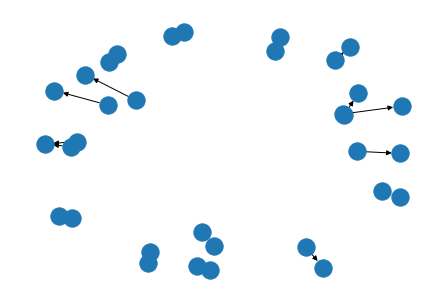

In [ ]:
nx.draw(network)

### Calculate Graph Measures

In [ ]:
test_1 = res_test.copy()

df_temp1 = calculate_graph_metric_max_min_citation_graph("degree", df_enriched , network)
boost1 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp1)  * 3
reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)

<ipython-input-98-705d6ec787b9>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_mean = test_1 >> pt.apply.doc_score(boost1)


In [ ]:
test_2 = res_test.copy()
df_temp2 = calculate_graph_metric_max_min_citation_graph("degree", df_enriched , network)
boost2 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp2)* 3
reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


<ipython-input-99-637efb091bbc>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_degree_max = test_2 >> pt.apply.doc_score(boost2)


In [ ]:
test_3 = res_test.copy()

df_temp3 = calculate_graph_metric_max_min_citation_graph("closeness", df_enriched , network)
boost3 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp3)* 3
reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)

<ipython-input-100-e7b1896080e6>:5: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_closeness_mean = test_3 >> pt.apply.doc_score(boost3)


In [ ]:
test_4 = res_test.copy()
df_temp4 = calculate_graph_metric_max_min_citation_graph("closeness", df_enriched , network)
boost4 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp4) * 3
reranker_closeness_max = test_4 >> pt.apply.doc_score(boost4)

<ipython-input-101-a9277be745b6>:4: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  reranker_closeness_max = test_4 >> pt.apply.doc_score(boost4)


In [ ]:
test_5 = res_test.copy()

df_temp5 = calculate_graph_metric_max_min_citation_graph("betweeness", df_enriched , network)
boost5 = lambda doc: doc['score'] + avg_boost(doc['docno'], df_temp5)* 3
reranker_betweeness_mean = test_5 >> pt.apply.doc_score(boost5)

ZeroDivisionError: ignored

In [ ]:
test_6 = res_test.copy()
df_temp6 = calculate_graph_metric_max_min_citation_graph("betweeness", df_enriched , network)
boost6 = lambda doc: doc['score'] + max_boost(doc['docno'], df_temp6) * 3
reranker_betweeness_max = test_6 >> pt.apply.doc_score(boost6)

ZeroDivisionError: ignored

In [ ]:
#systems = [
#    res_test
#]
systems = [res_test, reranker_degree_mean, reranker_degree_max, reranker_closeness_mean, reranker_closeness_max]#, reranker_betweeness_mean,  reranker_betweeness_max]
names = ["Baseline", "reranker_degree_mean", "reranker_degree_max", "reranker_closeness_mean", "reranker_closeness_max"]#, "reranker_betweeness_mean",  "reranker_betweeness_max"]

topics = dataset.get_topics('title').head(1)

qrels = dataset.get_qrels()

eval_metrics=['P_20', 'ndcg_cut_20', 'map']

exp_res = pt.Experiment(
    systems,
    topics,
    qrels,
    eval_metrics,
    names=names,
    baseline=0
)

exp_res

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,name,map,P_20,ndcg_cut_20,map +,map -,map p-value,P_20 +,P_20 -,P_20 p-value,ndcg_cut_20 +,ndcg_cut_20 -,ndcg_cut_20 p-value
0,Baseline,0.104025,0.7,0.519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,reranker_degree_mean,0.104806,0.7,0.519,1.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN
2,reranker_degree_max,0.104806,0.7,0.519,1.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN
3,reranker_closeness_mean,0.104034,0.7,0.519,1.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN
4,reranker_closeness_max,0.104034,0.7,0.519,1.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN


In [ ]:
print("Some statistics of this graph:")
print(nx.info(network))
print("The density of the graph is {}.".format(nx.density(network)))

Some statistics of this graph:
DiGraph with 2790 nodes and 17 edges
The density of the graph is 2.18472210977329e-06.


<ipython-input-15-af205577a50b>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


In [ ]:
pip install scipy==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


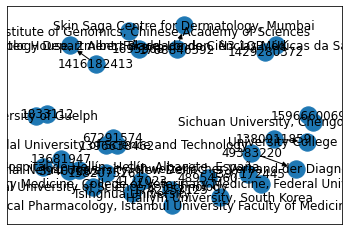

In [ ]:
nx.draw_networkx(network)

In [ ]:
df.iloc[1]["cit_authors"]

[{'paperId': 'a5fca0d540ddb55e6fe41c518d6f8bcfaf7b8a42',
  'authors': [{'authorId': '2705807', 'name': 'Juliana Glavina'},
   {'authorId': '145127615', 'name': 'Nicolás Palopoli'},
   {'authorId': '1991365', 'name': 'L. Chemes'}]},
 {'paperId': '443163e5b4d960fc2370cdc5b89634e09dda6327',
  'authors': [{'authorId': '1712173579', 'name': 'P. Devnath'},
   {'authorId': '2152257087', 'name': 'Shah Wajed'},
   {'authorId': '2180971019', 'name': 'Ripu Chandra Das'},
   {'authorId': '2151877417', 'name': 'Sanchita Kar'},
   {'authorId': '79865626', 'name': 'Iftekharul Islam'},
   {'authorId': '145956509', 'name': 'H. Masud'}]},
 {'paperId': 'c0c98ccec8089f558ea49969ec55e722ad5d32a4',
  'authors': [{'authorId': '145845603', 'name': 'P. Lawrence'},
   {'authorId': '1423109242', 'name': 'B. Escudero-Pérez'}]},
 {'paperId': '3d1ac1334a708438ed7c69dde572f3ebcba8846e',
  'authors': [{'authorId': '2028926901', 'name': 'Oliver Siering'},
   {'authorId': '3712781', 'name': 'R. Cattaneo'},
   {'authorI

In [ ]:
df

,docid,authors_with_id,cit_authors,fos2,fos1,journals
1,6iu1dtyl,"[{'authorId': '48909646', 'name': 'J. Barry', ...",[{'paperId': '61f7fb8419014744308c057a68504e82...,"[{'category': 'Medicine', 'source': 'external'...",[Medicine],[Journal of Translational Medicine]
238,vnafx1ng,"[{'authorId': '143786367', 'name': 'Michael K....",[{'paperId': 'a5fca0d540ddb55e6fe41c518d6f8bcf...,"[{'category': 'Medicine', 'source': 'external'...","[Medicine, Biology]",[PLoS ONE]
275,hp5x637c,"[{'authorId': '4529458', 'name': 'Xueyong Huan...",[{'paperId': '28cb2c1af234a53592b93eb6d905a703...,"[{'category': 'Biology', 'source': 'external'}...","[Biology, Medicine]",[PLoS Neglected Tropical Diseases]
391,8y24j34j,"[{'authorId': '4962377', 'name': 'Danielle R. ...",[{'paperId': '4709b3e8c0ecbe8deca17ac0a54937b0...,"[{'category': 'Biology', 'source': 'external'}...",[Biology],[Emerging Infectious Diseases]
527,6eb2jgl7,"[{'authorId': '11370807', 'name': 'S. Xiao', '...",[{'paperId': '51662a58914388cbe661f33fc5c0b2ae...,"[{'category': 'Biology', 'source': 'external'}...","[Biology, Medicine]",[International Journal of Environmental Resear...
...,...,...,...,...,...,...
25692,n38uxkx6,"[{'authorId': '6558350', 'name': 'Somayeh Shok...",[{'paperId': '2c08d23ffcf9419b34c0372f254bb9f6...,"[{'category': 'Medicine', 'source': 'external'...",[Medicine],[Journal of Cellular Physiology]
25699,on70zzn0,"[{'authorId': '31952434', 'name': 'Javier A. J...",[{'paperId': 'f9e1452715a88d80a13dc29bf4ab8f5e...,"[{'category': 'Biology', 'source': 'external'}...","[Biology, Medicine]",[iScience]
25814,us1spoxu,"[{'authorId': '6111167', 'name': 'I. Cornelis'...",[{'paperId': '982606742816b144d503abec9a7fc928...,"[{'category': 'Medicine', 'source': 'external'...",[Medicine],[The Journal of Small Animal Practice]
25887,zdhg4axx,"[{'authorId': '3092655', 'name': 'K. Shirato',...",[{'paperId': 'd9b738ddf4179ee15e43a63501e3b9ef...,"[{'category': 'Biology', 'source': 'external'}...","[Biology, Medicine]",[Archives of Virology]


In [ ]:
test

,title,doi,date,abstract,docno,authors_with_id,cit_authors,affiliations,journals,fos,fos2,author_id,cit_author_id
14,The site of origin of the 1918 influenza pande...,10.1186/1479-5876-2-3,2004-01-20,,6iu1dtyl,"[{'authorId': '48909646', 'name': 'J. Barry', ...","[{'authorId': '1649637386', 'name': 'J. Tai'},...",[[]],Journal of Translational Medicine,[Medicine],"[{'category': 'Medicine', 'source': 'external'...",[48909646],"[1649637386, 2158006296, 49495810, 3025236, 74..."
1394,Evolution and Structural Organization of the C...,10.1371/journal.pone.0090003,2014-02-25,The phosphoprotein (P) gene of most Paramyxovi...,vnafx1ng,"[{'authorId': '143786367', 'name': 'Michael K....","[{'authorId': '2705807', 'name': 'Juliana Glav...","[[], [], []]",PLoS ONE,"[Medicine, Biology]","[{'category': 'Medicine', 'source': 'external'...","[143786367, 12207448, 32015097]","[2705807, 145127615, 1991365]"
1616,The Evolutionary History and Spatiotemporal Dy...,10.1371/journal.pntd.0003237,2014-10-16,"BACKGROUND: In 2007, a novel bunyavirus was fo...",hp5x637c,"[{'authorId': '4529458', 'name': 'Xueyong Huan...","[{'authorId': '1392916174', 'name': 'T. E. Siz...","[[], [], [], [], [], [], [], [], [], [], [], []]",PLoS Neglected Tropical Diseases,"[Biology, Medicine]","[{'category': 'Biology', 'source': 'external'}...","[4529458, 46458173, 6560236, 2110756875, 21578...","[1392916174, 145433888, 9749332]"
2257,"Infection, Replication, and Transmission of Mi...",10.3201/eid2206.160192,2016-06-16,Middle East respiratory syndrome coronavirus i...,8y24j34j,"[{'authorId': '4962377', 'name': 'Danielle R. ...","[{'authorId': '52210831', 'name': 'B. Schindel...","[[], [], [], []]",Emerging Infectious Diseases,[Biology],"[{'category': 'Biology', 'source': 'external'}...","[4962377, 1398955671, 6165395, 34612756]","[52210831, 2037433026, 2119559508, 2026720281,..."
3012,Airborne or Fomite Transmission for Norovirus?...,10.3390/ijerph14121571,2017-12-14,"Norovirus infection, a highly prevalent condit...",6eb2jgl7,"[{'authorId': '11370807', 'name': 'S. Xiao', '...","[{'authorId': '49674037', 'name': 'Alice Boari...","[[], [], []]",International Journal of Environmental Researc...,"[Biology, Medicine]","[{'category': 'Biology', 'source': 'external'}...","[11370807, 46741213, 1527092615]","[49674037, 46506126, 2131138379, 46191303, 218..."


### Create Graph (FOS)

In [ ]:
def create_fos_graph(df):
  G , df = create_cocitation_graph(df)
  
  nodes = []
  edges = []
  

  for i, j in df.iterrows():
   for k in j["author_id"]:
     if k is not None and k != "NaN" and k != []:
       print(k)
       nodes.append(k)
   """
   for k in j["fos1"]:
      if k is not None and k != "NaN" and k != []and k!= "Medicine":
        print(k)
        nodes.append(k)
   """
   if j["fos1"] is not None and j["fos1"]  != "NaN" and j["fos1"]  != []and j["fos1"] != "Medicine" and j["fos1"] != ["NaN"]:
      print(k)
      nodes.append(str(j["fos1"]))
   """
   for l in j["fos1"]:
      if l is not None and l != "NaN" and l != [] and l!= "Medicine":
        for m in j["author_id"]:
          if m is not None:
            edges.append([l, m])
    """
    #for l in j["fos1"]:
   if j["fos1"] is not None and j["fos1"] != "NaN" and j["fos1"] != [] and j["fos1"]!= "Medicine" and j["fos1"] != ["NaN"]:
      for m in j["author_id"]:
        if m is not None and m != []:
          edges.append([str(j["fos1"]), m])


  """
  for i,j in df.iterrows():
    #if j["authors_with_id"] != [] and j["authors_with_id"] != []:
      #print(j["authors_with_id"])
   
    for k in j["authors_with_id"]:
      if k["authorId"] is not None:
        nodes.append(k["authorId"])
    for k in j["fos"]:
        #if k["authorId"] is not None:
        #  nodes.append(k["authorId"])
        if k is not None:
          #print(k["affiliations"])
          edges.append([k["authorId"], k["affiliations"][0]])
          nodes.append(k["affiliations"][0])
          print(k["affiliations"][0])
      except:
        continue
  """

  G = nx.DiGraph()
  print("test")
  G.add_nodes_from(nodes)
  print("test2")
  G.add_edges_from(edges)
  
  return G

In [ ]:
network = create_fos_graph(df[10:40])

46571460
3738082
3738082
48159343
2068345088
8285081
145365107
2145179043
2145179043
48188558
2473682
2152182
2152182
145302349
119901393
2112215887
2112215887
50697598
50697598
4127023
4127023
1605710537
1605710537
2119107411
2038251595
2108930473
123082147
4926291
2108158023
2108158023
145580795
145580795
50696332
50696332
49750570
49750570
1391098808
7624755
7624755
144527410
144527410
14031846
14031846
5928793
113182722
40794356
40794356
2474002
2474002
144987136
46762869
50224409
3801277
3801277
1877628
1877628
116981057
116981057
1398182984
145504521
35068592
35068592
6099633
6099633
4389646
114906124
2599737
2599737
144067070
144067070
145931871
144306257
145781175
46844089
1891531
3508617
6780849
2107368102
145537748
145537748
11993770
2908383
2908383
9866700
9866700
9866700
test
test2


In [ ]:
print("Some statistics of this graph:")
print(nx.info(network))
print("The density of the graph is {}.".format(nx.density(network)))

Some statistics of this graph:
DiGraph with 39 nodes and 67 edges
The density of the graph is 0.04520917678812416.


<ipython-input-44-af205577a50b>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


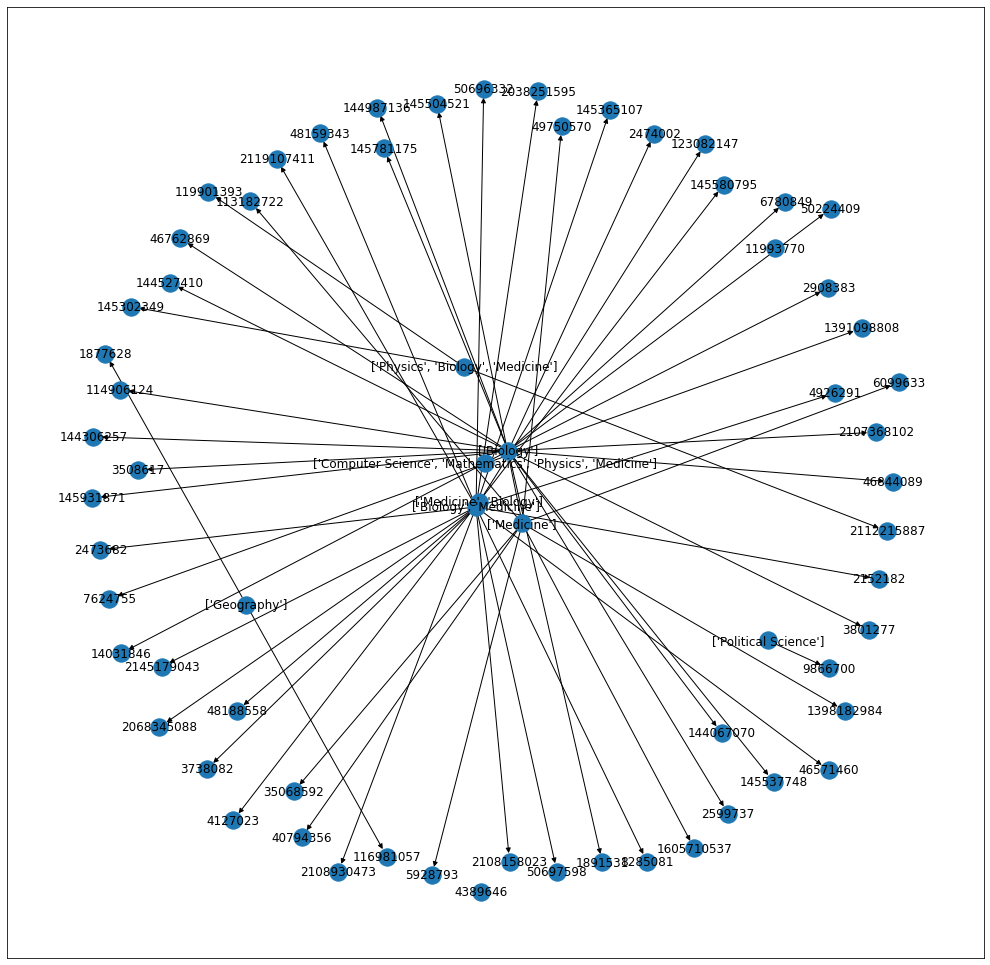

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text
plt.figure(3,figsize=(17.5,17.5) )
layout = nx.kamada_kawai_layout(network)


nx.draw_networkx(network)
plt.show()
